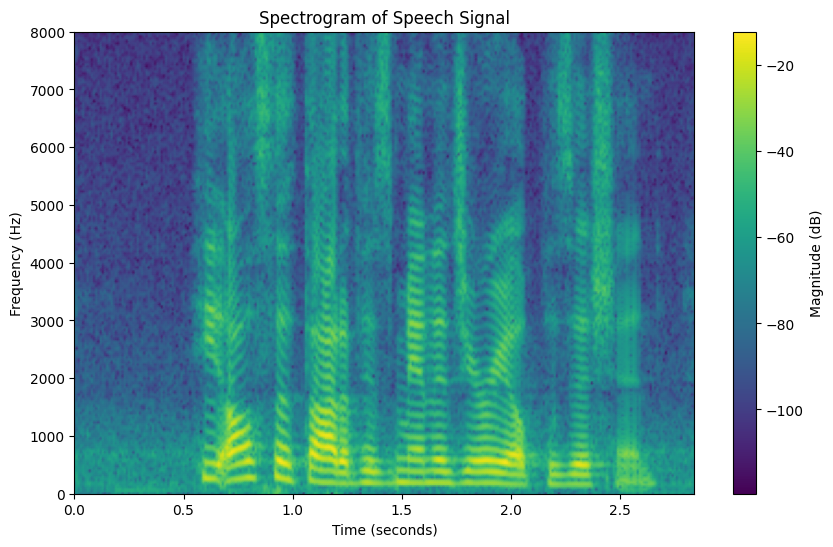

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wav

sample_rate, speech_signal = wav.read('data/02_native.wav')

# Convert stereo to mono if needed
if speech_signal.ndim > 1:
    speech_signal = speech_signal[:, 0]

# Preprocess the signal: normalize signal
speech_signal = speech_signal / np.max(np.abs(speech_signal))

# Define parameters for STFT
window_size = int(0.025 * sample_rate)  # 25 ms window
hop_size = int(0.010 * sample_rate)     # 10 ms hop size    
window = signal.windows.hann(window_size)

# Compute STFT
frequencies, times, spectrogram = signal.stft(speech_signal, fs=sample_rate, window=window, nperseg=window_size, noverlap=window_size - hop_size)

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(spectrogram) + 1e-6), shading='gouraud', cmap='viridis')
plt.title('Spectrogram of Speech Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.colorbar(label='Magnitude (dB)')
plt.ylim(0, 8000)
plt.show()